## Elanchezhian K R

In [1]:
import pandas as pd # Importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the Dataset
df = pd.read_csv('housing.csv')
df.head() # to view the first 5 rows of dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info() # to find the dtypes of features in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#checking for missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

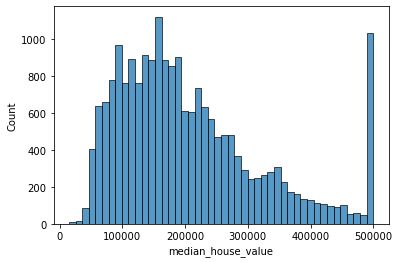

In [5]:
# Overview of the target variable (median_value_home):
sns.histplot(df.median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

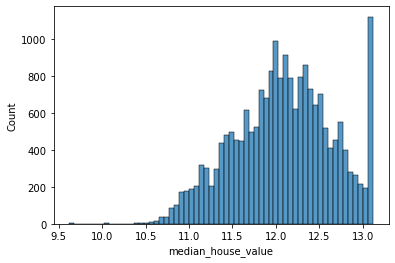

In [6]:
sns.histplot(np.log1p(df.median_house_value))

In [7]:
# Preparation and cleaning of the data set

df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

df = df.drop(columns=["ocean_proximity"])
df_init = df.copy()

display(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

## Question 1:

### What feature has missing values? How many missing values does it have?

In [8]:
# Exploring the data set for missing values by columns:

df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [9]:
# only the 'total_bedrooms' column has missing values

number_of_missing_values = df.isna().sum().sum()

print(f"Answer to question 1:")
print(f"The number of missing values is: {number_of_missing_values}")

Answer to question 1:
The number of missing values is: 207


## Question 2

### What's the median (50% percentile) for variable 'population'?

In [10]:
# Exploring the data set for median value for population column:

median_of_population = df.population.median()

print(f"Answer to question 2:")
print(f"Median value for population variable = {median_of_population:.0f}")

Answer to question 2:
Median value for population variable = 1166


## Data Split

In [11]:
# shuffle the data:

n = len(df)

idx = np.arange(n)

np.random.seed(42) 
np.random.shuffle(idx) 

In [12]:
# add idx into data:

df["idx"] = idx

df = df.sort_values(by="idx", ascending=True)
df = df.drop(columns=["idx"])
df = df.reset_index(drop=True)

# check
display(df.head(2))
display(df_init.head(2))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0
1,-117.13,32.91,16.0,3230.0,579.0,1825.0,576.0,4.2969,151200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [13]:
# calculating the number of records in each part:

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print(f"total number of records in dataset = {n}")
print(f"split dataset: \n\t train = {n_train} \n\t val = {n_val} \n\t test = {n_test}")

total number of records in dataset = 20640
split dataset: 
	 train = 12384 
	 val = 4128 
	 test = 4128


In [14]:
# splitting the data into training, validation and test sets:

df_train = df.iloc[:n_train]
df_val = df.iloc[n_train : n_train + n_val]
df_test = df.iloc[n_train + n_val :]

print(f"length of training set = {len(df_train)}")
print(f"length of validation set = {len(df_val)}")
print(f"length of test set = {len(df_test)}")

length of training set = 12384
length of validation set = 4128
length of test set = 4128


In [15]:
# log1p transformation to [y] and separating features from the target variable :

y_train = np.log1p(np.array(df_train.median_house_value.values))
y_val = np.log1p(np.array(df_val.median_house_value.values))
y_test = np.log1p(np.array(df_test.median_house_value.values))

df_train_f = df_train.drop(columns=["median_house_value"])
df_val_f = df_val.drop(columns=["median_house_value"])
df_testf_f = df_test.drop(columns=["median_house_value"])

## Question 3

#### I need to fill in missing values in total_bedrooms feature
#### I have two options:
#### 1. fill it with 0
#### 2. fill it with the mean or median of this variable (use only for train dataset)
#### I have to use and try out two options and train it a linear regression model without regularization
#### I'll use the validation dataset to evaluate the models and compare the RMSE of each option.
#### Scores of RSME I'll round to 2 decimal digits using round(score, 2) function preparing a dataset with filled values in total_bedrooms using fillna(0)

In [16]:
def prepare_X_null(df):
    #  function to prepare dataset with 0
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X


def prepare_X_mean(df):
    # function to prepare dataset with mean
    df = df.copy()
    mean = df.total_bedrooms.mean()
    df.total_bedrooms = df.total_bedrooms.fillna(mean)
    X = df.values
    return X


def prepare_X_median(df):
    # function to prepare dataset with median
    df = df.copy()
    median = df.total_bedrooms.median()
    df.total_bedrooms = df.total_bedrooms.fillna(median)
    X = df.values
    return X

In [18]:
def train_linear_regression(x_train, y_train):
    # function to train the Linear Regression model
    ones = np.ones(x_train.shape[0])
    x_train = np.column_stack([ones, x_train])

    XTX = x_train.T.dot(x_train)
    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(x_train.T).dot(y_train)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w


def predict_linear_regression(x_val, w0, w_array):
    # function for marking predictions:
    y_pred = w0 + x_val.dot(w_array)
    return y_pred


def rmse(y_pred, y_val):
    # function to calculate RMSE:
    SE = (y_pred - y_val) ** 2
    MSE = SE.mean()
    RMSE = np.sqrt(MSE)
    return RMSE

x_train_0 = prepare_X_null(df_train_f)
x_train_mean = prepare_X_mean(df_train_f)
x_train_median = prepare_X_median(df_train_f)


x_null_val = prepare_X_null(df_val_f)
x_mean_val = prepare_X_mean(df_val_f)
x_median_val = prepare_X_median(df_val_f)


w0_null, w_null = train_linear_regression(x_train_0, y_train)
w0_mean, w_mean = train_linear_regression(x_train_mean, y_train)
w0_median, w_median = train_linear_regression(x_train_median, y_train)


y_null_pred = predict_linear_regression(x_null_val, w0_null, w_null)
y_mean_pred = predict_linear_regression(x_mean_val, w0_mean, w_mean)
y_median_pred = predict_linear_regression(x_median_val, w0_median, w_median)


rmse_option_null = rmse(y_null_pred, y_val)
rmse_option_mean = rmse(y_mean_pred, y_val)
rmse_option_median = rmse(y_median_pred, y_val)


print(f"RMSE score for option_null = {round(rmse_option_null, 2)}")
print(f"RMSE score for option_mean = {round(rmse_option_mean, 2)}")
print(f"RMSE score for option_median = {round(rmse_option_median, 2)}")

print(f"\nAnswer to question 3:")
print(f"The scores of all options are the same")

RMSE score for option_null = 0.34
RMSE score for option_mean = 0.34
RMSE score for option_median = 0.34

Answer to question 3:
The scores of all options are the same


## Question 4
### I need to train a regular linear regression.
### Assumptions:
### Fill in the NAs with the value 0.
### Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
### Use RMSE to evaluate the model on the validation dataset.
### Round the RMSE results to 2 digits after the decimal point.

In [19]:
def train_linear_regression_reg(x_train, y_train, r=0):
    # function for Linear Regression model training with Regularization
    ones = np.ones(x_train.shape[0])
    x_train = np.column_stack([ones, x_train])

    XTX = x_train.T.dot(x_train)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(x_train.T).dot(y_train)

    w0 = w_full[0]
    w = w_full[1:]

    return w0, w


r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

x_train = prepare_X_null(df_train_f)
x_val = prepare_X_null(df_val_f)

for r in r_list:

    w0, w = train_linear_regression_reg(x_train, y_train, r=r)
    y_pred = predict_linear_regression(x_val, w0, w)

    rmse_score = rmse(y_val, y_pred)
    print(f"For r = {r:>7} RMSE_score = {round(rmse_score, 2)}")

print(f"\nAnswer to question 4:")
print(
    f"\tRegularization does not give evident results. \n\tThe smallest r with the same RMSE is 0"
)

For r =       0 RMSE_score = 0.34
For r =   1e-06 RMSE_score = 0.34
For r =  0.0001 RMSE_score = 0.34
For r =   0.001 RMSE_score = 0.34
For r =    0.01 RMSE_score = 0.34
For r =     0.1 RMSE_score = 0.34
For r =       1 RMSE_score = 0.34
For r =       5 RMSE_score = 0.35
For r =      10 RMSE_score = 0.35

Answer to question 4:
	Regularization does not give evident results. 
	The smallest r with the same RMSE is 0


## Question 5

In [20]:
def rmse_random_seed(df, random_seed):

    df = df.copy()
    n = len(df)
    idx = np.arange(n)
    np.random.seed(random_seed)
    np.random.shuffle(idx)

    df["idx"] = idx
    df = df.sort_values(by="idx", ascending=True)
    df = df.drop(columns=["idx"])
    df = df.reset_index(drop=True)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    df_train = df.iloc[:n_train]
    df_val = df.iloc[n_train : n_train + n_val]
    df_test = df.iloc[n_train + n_val :]

    y_train = np.log1p(np.array(df_train.median_house_value.values))
    y_val = np.log1p(np.array(df_val.median_house_value.values))

    df_train_f = df_train.drop(columns=["median_house_value"])
    df_val_f = df_val.drop(columns=["median_house_value"])

    x_train = prepare_X_null(df_train_f)
    w0, w = train_linear_regression(x_train, y_train)
    
    x_val = prepare_X_null(df_val_f)
    y_pred = predict_linear_regression(x_val, w0, w)
    
    rmse_score = rmse(y_pred, y_val)
    return rmse_score


rmse_scores_list = []
s = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for seed in s:
    rmse_score = rmse_random_seed(df_init, seed)
    rmse_scores_list.append(rmse_score)

    print(f"For Seed = {seed}, RMSE = {rmse_score}")

For Seed = 0, RMSE = 0.33657247719549266
For Seed = 1, RMSE = 0.3384915167197722
For Seed = 2, RMSE = 0.3418221508298331
For Seed = 3, RMSE = 0.33944045455454047
For Seed = 4, RMSE = 0.33612008008959227
For Seed = 5, RMSE = 0.3392376355770182
For Seed = 6, RMSE = 0.35189733420182595
For Seed = 7, RMSE = 0.3486368768399247
For Seed = 8, RMSE = 0.34355356916726465
For Seed = 9, RMSE = 0.33846087438085676


In [24]:
# calculating the standard deviation of rmse results for different data splits:

standard_deviation = round(np.std(rmse_scores_list), 3)

print(f"\nAnswer to question 5:")
print(f"Result of standard deviation of all rmse score = {standard_deviation}")


Answer to question 5:
Result of standard deviation of all rmse score = 0.005


# Question 6

In [23]:
df = df.copy()
n = len(df)
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df["idx"] = idx
df = df.sort_values(by="idx", ascending=True)
df = df.drop(columns=["idx"])
df = df.reset_index(drop=True)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train : n_train + n_val]
df_test = df.iloc[n_train + n_val :]


y_train = np.log1p(np.array(df_train.median_house_value.values))
y_val = np.log1p(np.array(df_val.median_house_value.values))
y_test = np.log1p(np.array(df_test.median_house_value.values))

df_train_f = df_train.drop(columns=["median_house_value"])
df_val_f = df_val.drop(columns=["median_house_value"])
df_test_f = df_test.drop(columns=["median_house_value"])


df_train_val = pd.concat([df_train_f, df_val_f])
y_train_val = np.concatenate([y_train, y_val])

x_train_val = prepare_X_null(df_train_val)
w0, w = train_linear_regression_reg(x_train_val, y_train_val, r=0.001)

x_test = prepare_X_null(df_test_f)
y_pred = predict_linear_regression(x_test, w0, w)

rmse_score = rmse(y_pred, y_test)

print(f"\nAnswer to question 6:")
print(f"RMSE on combine dataset = {round(rmse_score, 2)}")


Answer to question 6:
RMSE on combine dataset = 0.33
